In [15]:
import os
import pandas as pd
import nibabel as nib
from collections import Counter
import matplotlib.pyplot as plt

In [10]:
# Load data
current_directory = os.environ['HOME']
test_data_path = os.path.join(current_directory, 'mri-infarct-segmentation/data/DUPONT/datasplit/FixedPath/test_data.csv')
test_data_path = os.path.join(current_directory, 'mri-infarct-segmentation/data/DUPONT/datasplit/FixedPath/val_data.csv')
df_test = pd.read_csv(test_data_path)
data = []
for i in range(0, len(df_test)):
    data.append([os.path.join(current_directory, df_test["DWI_path"][i]),
                os.path.join(current_directory, df_test["ADC_path"][i]),
                os.path.join(current_directory, df_test["b0"][i]),
                os.path.join(current_directory, df_test["Label_path"][i])])

In [11]:
shapes = []
for subject in data:
    temp_vol = nib.load(subject[0]).get_fdata()
    temp_shape = temp_vol.shape
    shapes.append(temp_shape)

Counter(shapes)

Counter({(256, 256, 22): 4})

In [ ]:
shapes = []
for subject in subjects:
    #print(subject[0])

    for i in range(1,2): #4
        temp_vol = nib.load(subject[i]).get_fdata()
        temp_shape = temp_vol.shape
        #print(temp_shape)
        shapes.append(temp_shape)
        if temp_shape == (256, 256, 23):
            print('--',subject[i])

Counter(shapes)

In [12]:
import numpy as np
vol = temp_vol
# Pad the array along the third dimension to make it (256, 256, 32)
target_shape = (256, 256, 32)
padded_vol = np.pad(vol, ((0, 0), (0, 0), (0, target_shape[2] - vol.shape[2])), mode='constant')

print("Original Shape:", vol.shape)
print("Padded Shape:", padded_vol.shape)

Original Shape: (256, 256, 22)
Padded Shape: (256, 256, 32)


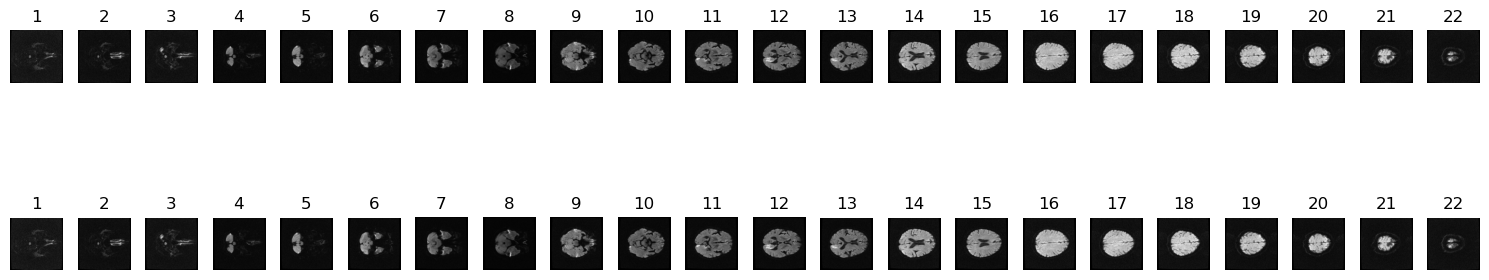

In [17]:
# Create subplots for each slice
num_slices = vol.shape[2]
fig, axs = plt.subplots(2, num_slices, figsize=(15, 5))

# Plot original slices
for i in range(num_slices):
    axs[0, i].imshow(vol[:, :, i], cmap='gray')
    axs[0, i].set_title(f'{i+1}')
    axs[0, i].axis('off')

# Plot padded slices
for i in range(num_slices):
    axs[1, i].imshow(padded_vol[:, :, i], cmap='gray')
    axs[1, i].set_title(f'{i+1}')
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()

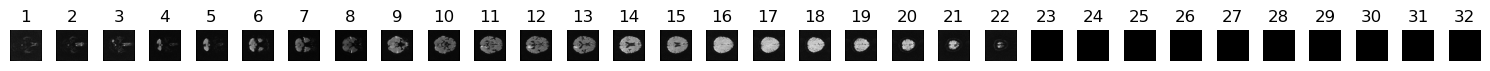

In [20]:
# Plot padded slices
num_slices = padded_vol.shape[2]
fig, axs = plt.subplots(1, num_slices, figsize=(15, 5))
for i in range(num_slices):
    axs[i].imshow(padded_vol[:, :, i], cmap='gray')
    axs[i].set_title(f'{i+1}')
    axs[i].axis('off')
plt.tight_layout()
plt.show()